# Communicating with the Keithley Picoammeter

In [1]:
import json
import matplotlib.pyplot as plt
from labserver.devices.picoammeter import PicoAmmeter

amm = PicoAmmeter(port = "COM7")

print(f"Connecting to Picoammeter on {amm.port}...")
amm.connect()




Connecting to Picoammeter on COM7...


In [2]:
curr = amm.read_current()
print(f"Current: {curr*1e9}  nA")

Current: 7.137476  nA


In [5]:
res = amm.read_multisample(n=100, dt = 0.1, return_arr = True)

print(f"Multi-sample result: {json.dumps(res.dict(), indent = 2)}")


Multi-sample result: {
  "n_samples": 100,
  "mean": 7.67589186e-09,
  "median": 7.686497e-09,
  "std": 3.003877162733196e-10,
  "samples": [
    7.130419e-09,
    7.667682e-09,
    7.676428e-09,
    7.524028e-09,
    7.053366e-09,
    7.777528e-09,
    7.331534e-09,
    7.817023e-09,
    7.773144e-09,
    7.752258e-09,
    7.581455e-09,
    7.743008e-09,
    7.458976e-09,
    7.59278e-09,
    7.915087e-09,
    7.926198e-09,
    8.091755e-09,
    7.50512e-09,
    7.881914e-09,
    8.062035e-09,
    7.980134e-09,
    8.384459e-09,
    7.665085e-09,
    7.783022e-09,
    8.168271e-09,
    7.993304e-09,
    7.043957e-09,
    7.92528e-09,
    7.879056e-09,
    7.369247e-09,
    7.671424e-09,
    7.872124e-09,
    7.751556e-09,
    7.266197e-09,
    8.071883e-09,
    7.733044e-09,
    7.714979e-09,
    7.695263e-09,
    7.695821e-09,
    7.195576e-09,
    7.394716e-09,
    7.764919e-09,
    7.665022e-09,
    7.62358e-09,
    7.883978e-09,
    8.402955e-09,
    7.387944e-09,
    7.754149e-09

Text(0.5, 1.0, 'Picoammeter Multi-sample Readings')

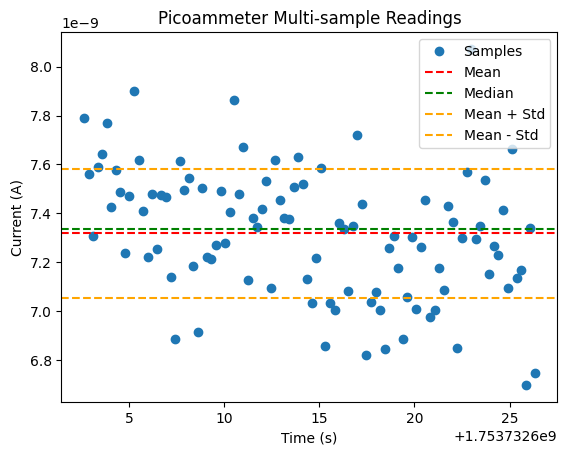

In [ ]:

plt.figure()
plt.plot(res.times, res.samples,'o', label='Samples')
plt.axhline(res.mean, color='r', linestyle='--', label='Mean') 
plt.axhline(res.median, color='g', linestyle='--', label='Median')
plt.axhline(res.mean + res.std, color='orange', linestyle='--', label='Mean + Std')
plt.axhline(res.mean - res.std, color='orange', linestyle='--', label='Mean - Std')
plt.legend()
plt.xlabel('Time (s)')  
plt.ylabel('Current (A)')
plt.title('Picoammeter Multi-sample Readings')

In [3]:
# disconnect the ammeter
amm.disconnect()